## Money creation example 2: Money creation and destruction through lending
We demonstrate how money is created through bank lending and destroyed through repayment, and the effects of interest payments.

We start by importing required utilities.

In [1]:
import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Ledger, Account, AccountSide

## Declaration of agents
We start by defining their agents and the accounts on their balance sheets:

In [2]:
bank = Ledger(residual_account_name="Equity")
private_agent = Ledger(residual_account_name="Equity")

bank.make_asset_accounts(['Cash','Loans','Reserves'])
bank.make_liability_accounts(['Deposits'])
bank.make_flow_accounts(['Interest income'])

private_agent.make_asset_accounts(['Cash','Deposits'])
private_agent.make_liability_accounts(['Loans'])
private_agent.make_flow_accounts(['Dividend income','Interest expenses'])

We further define a function that computes the money stocks according to our defined taxonomy:

In [3]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    # Bank money: bank liabilities that are money
    bank_money = bank.get_balance('Deposits')[1]
        
    print("Total (Bank) Money:",bank_money)

def print_balance_sheets_and_money_stocks():
    bank_balance_sheet = SVG(bank.draw_balance_sheet("Bank Balance Sheet"))
    private_agent_balance_sheet = SVG(private_agent.draw_balance_sheet("Private Agent Balance Sheet"))
    
    display_svg(bank_balance_sheet, private_agent_balance_sheet)
    print_money_stocks()

## Start of the example
We start by endowing the bank and the private agent with money (note that for the sake of this example it does not matter whether the bank is a commercial or central bank).

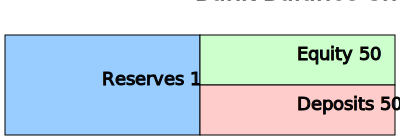

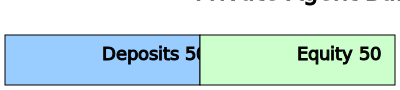

Total (Bank) Money: 50


In [4]:
bank.book(debit=[('Reserves',100)],credit=[('Equity',50),('Deposits',50)])
private_agent.book(debit=[('Deposits',50)],credit=[('Equity',50)])
bank.book_end_of_period()
private_agent.book_end_of_period()
print_balance_sheets_and_money_stocks()

The bank now grants a loan to the private agent, thereby increasing the stock of total money:

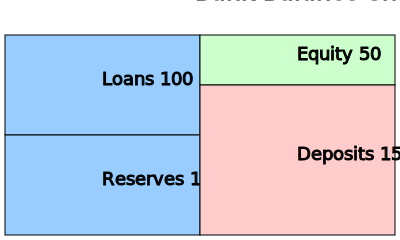

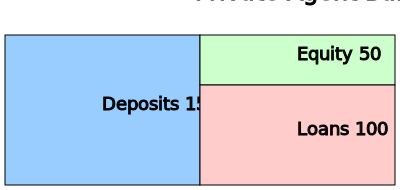

Total (Bank) Money: 150


In [5]:
bank.book(debit=[('Loans',100)],credit=[('Deposits',100)])
private_agent.book(debit=[('Deposits',100)],credit=[('Loans',100)])
print_balance_sheets_and_money_stocks()

The private agent now pays some interest on its loan to the bank. Note that the money stock (temporarily) decreases, since the private agent uses its deposits to pay interest, thereby contributing to the bank's profit (and in this case, since there are no other expenses, equity).

Bank P&L and change in capital:
Flow accounts:
   Interest income : 5
Profit for period:  5
--
Private agent P&L and change in capital:
Flow accounts:
   Interest expenses : -5
Profit for period:  -5
--


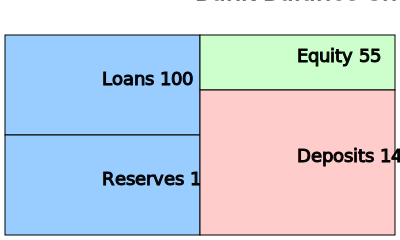

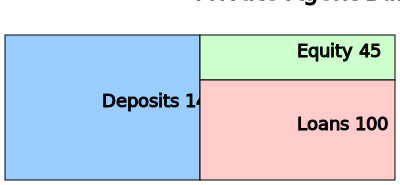

Total (Bank) Money: 145


In [6]:
private_agent.book(debit=[('Interest expenses',5)],credit=[('Deposits',5)])
bank.book(debit=[('Deposits',5)],credit=[('Interest income',5)])
print("Bank P&L and change in capital:")
bank.print_profit_and_loss()
print("Private agent P&L and change in capital:")
private_agent.print_profit_and_loss()
bank.book_end_of_period()
private_agent.book_end_of_period()
print_balance_sheets_and_money_stocks()

The private agent now repays the loan principal, thereby (permanently) destroying the money that was created through the loan granting:

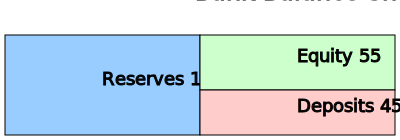

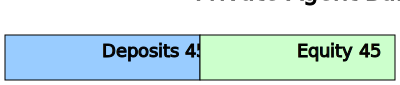

Total (Bank) Money: 45


In [7]:
private_agent.book(debit=[('Loans',100)],credit=[('Deposits',100)])
bank.book(debit=[('Deposits',100)],credit=[('Loans',100)])
print_balance_sheets_and_money_stocks()

The bank now transfers its profit from the period to the bank owners in the form of dividends, thereby increasing the money stock again. In this example the transfer goes back to the same private agent, but in practice the borrowers and owners of the bank would typically be different sets of agents. Note that in practice the bank's profit is also moved to other agents in a variety of other (expense) forms, e.g. as payment for purchases the bank makes and as salary to its employees.

Bank P&L and change in capital:
Flow accounts:
Profit for period:  0
Profit distribution and capital actions
   Dividend payout : -5
--
Private agent P&L and change in capital:
Flow accounts:
   Dividend income : 5
Profit for period:  5
--


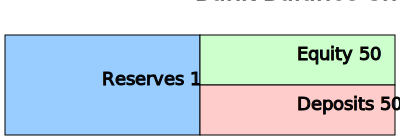

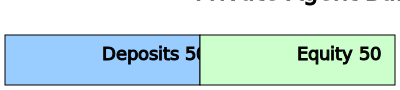

Total (Bank) Money: 50


In [8]:
bank.book(debit=[('Equity',5)],credit=[('Deposits',5)],text='Dividend payout')
private_agent.book(debit=[('Deposits',5)],credit=[('Dividend income',5)])
print("Bank P&L and change in capital:")
bank.print_profit_and_loss()
print("Private agent P&L and change in capital:")
private_agent.print_profit_and_loss()
bank.book_end_of_period()
private_agent.book_end_of_period()
print_balance_sheets_and_money_stocks()